<a href="https://colab.research.google.com/github/sohanchatterjee/ISE-490/blob/main/Copy_of_HW7_Classification_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Put your name and student ID here.**

Sohan Chatterjee

20006064

**HW7-EM/SYS 490**

**Homework - Classification**

Use what you've learned in Classification to analyze the dataset from `wine_quality.csv`.

This file contains multiple attributes of wine, such as "fixed acidity," "volatile acidity," "citric acid," "residual sugar," "chlorides," "free sulfur dioxide," "total sulfur dioxide," "density," "pH," "sulphates," "alcohol," and "quality."

We aim to study the relationship between the wine's "Quality" and the other 11 attributes. The quality of the wine has only two possible values, "A" and "B." We will use the stochastic gradient descent (SGD) method (`sklearn.linear_model.SGDClassifier`) to analyze this relationship.

Here are the tasks:

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change current directory
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
# Verify the current directory
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
# Verify the current directory
%ls

'Copy of Convert ipynb to HTML in Colab.ipynb'
'Copy of EM490- HW2_RegularExpression_Starter.ipynb'
'Copy of EM490- HW3_NumPy_Starter.ipynb'
'Copy of EM490-HW4_Pandas_Starter.ipynb'
'Copy of EM490 HW6_Machine_Learning_Landscape_Starter.ipynb'
'Copy of HW7_Classification_Starter.ipynb'
'Copy of PythonBasics_Starter.ipynb'
 EmissionsData.csv
 ISE490-HW1_PythonBasics_Starter.ipynb
 lifesat.csv
 population_vs_day.csv
 wine_quality.csv


## Q1. (0.5 points)

Load the data from `wine_quality.csv` as a DataFrame.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.4</td>
      <td>0.700</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.99780</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>B</td>
    </tr>
    <tr>
      <th>1</th>
      <td>7.8</td>
      <td>0.880</td>
      <td>0.00</td>
      <td>2.6</td>
      <td>0.098</td>
      <td>25.0</td>
      <td>67.0</td>
      <td>0.99680</td>
      <td>3.20</td>
      <td>0.68</td>
      <td>9.8</td>
      <td>B</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.8</td>
      <td>0.760</td>
      <td>0.04</td>
      <td>2.3</td>
      <td>0.092</td>
      <td>15.0</td>
      <td>54.0</td>
      <td>0.99700</td>
      <td>3.26</td>
      <td>0.65</td>
      <td>9.8</td>
      <td>B</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11.2</td>
      <td>0.280</td>
      <td>0.56</td>
      <td>1.9</td>
      <td>0.075</td>
      <td>17.0</td>
      <td>60.0</td>
      <td>0.99800</td>
      <td>3.16</td>
      <td>0.58</td>
      <td>9.8</td>
      <td>A</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7.4</td>
      <td>0.700</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.99780</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>B</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1594</th>
      <td>6.2</td>
      <td>0.600</td>
      <td>0.08</td>
      <td>2.0</td>
      <td>0.090</td>
      <td>32.0</td>
      <td>44.0</td>
      <td>0.99490</td>
      <td>3.45</td>
      <td>0.58</td>
      <td>10.5</td>
      <td>B</td>
    </tr>
    <tr>
      <th>1595</th>
      <td>5.9</td>
      <td>0.550</td>
      <td>0.10</td>
      <td>2.2</td>
      <td>0.062</td>
      <td>39.0</td>
      <td>51.0</td>
      <td>0.99512</td>
      <td>3.52</td>
      <td>0.76</td>
      <td>11.2</td>
      <td>A</td>
    </tr>
    <tr>
      <th>1596</th>
      <td>6.3</td>
      <td>0.510</td>
      <td>0.13</td>
      <td>2.3</td>
      <td>0.076</td>
      <td>29.0</td>
      <td>40.0</td>
      <td>0.99574</td>
      <td>3.42</td>
      <td>0.75</td>
      <td>11.0</td>
      <td>A</td>
    </tr>
    <tr>
      <th>1597</th>
      <td>5.9</td>
      <td>0.645</td>
      <td>0.12</td>
      <td>2.0</td>
      <td>0.075</td>
      <td>32.0</td>
      <td>44.0</td>
      <td>0.99547</td>
      <td>3.57</td>
      <td>0.71</td>
      <td>10.2</td>
      <td>B</td>
    </tr>
    <tr>
      <th>1598</th>
      <td>6.0</td>
      <td>0.310</td>
      <td>0.47</td>
      <td>3.6</td>
      <td>0.067</td>
      <td>18.0</td>
      <td>42.0</td>
      <td>0.99549</td>
      <td>3.39</td>
      <td>0.66</td>
      <td>11.0</td>
      <td>A</td>
    </tr>
  </tbody>
</table>
<p>1599 rows × 12 columns</p>
</div>

In [ ]:
import pandas as pd

df = pd.read_csv('wine_quality.csv')

## Q2. (1 point)

Count the number of instances for each quality category, "A" and "B." Visualize the counts using a bar chart with `value_counts()` and `plt.bar()`.

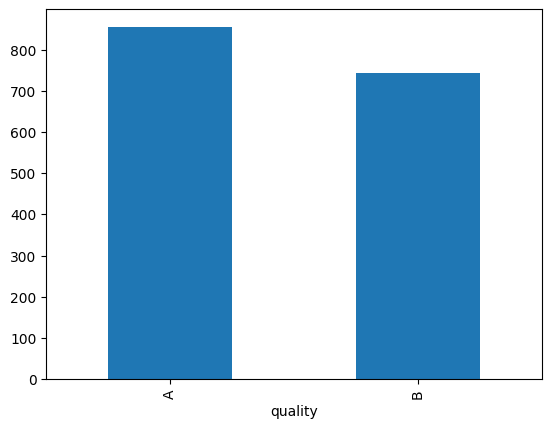

In [ ]:
import matplotlib.pyplot as plt

counts = df['quality'].value_counts()
counts.plot(kind='bar')
plt.show()

## Q3. (1.5 points)

Use histogram charts to visualize each of the other 11 attributes.

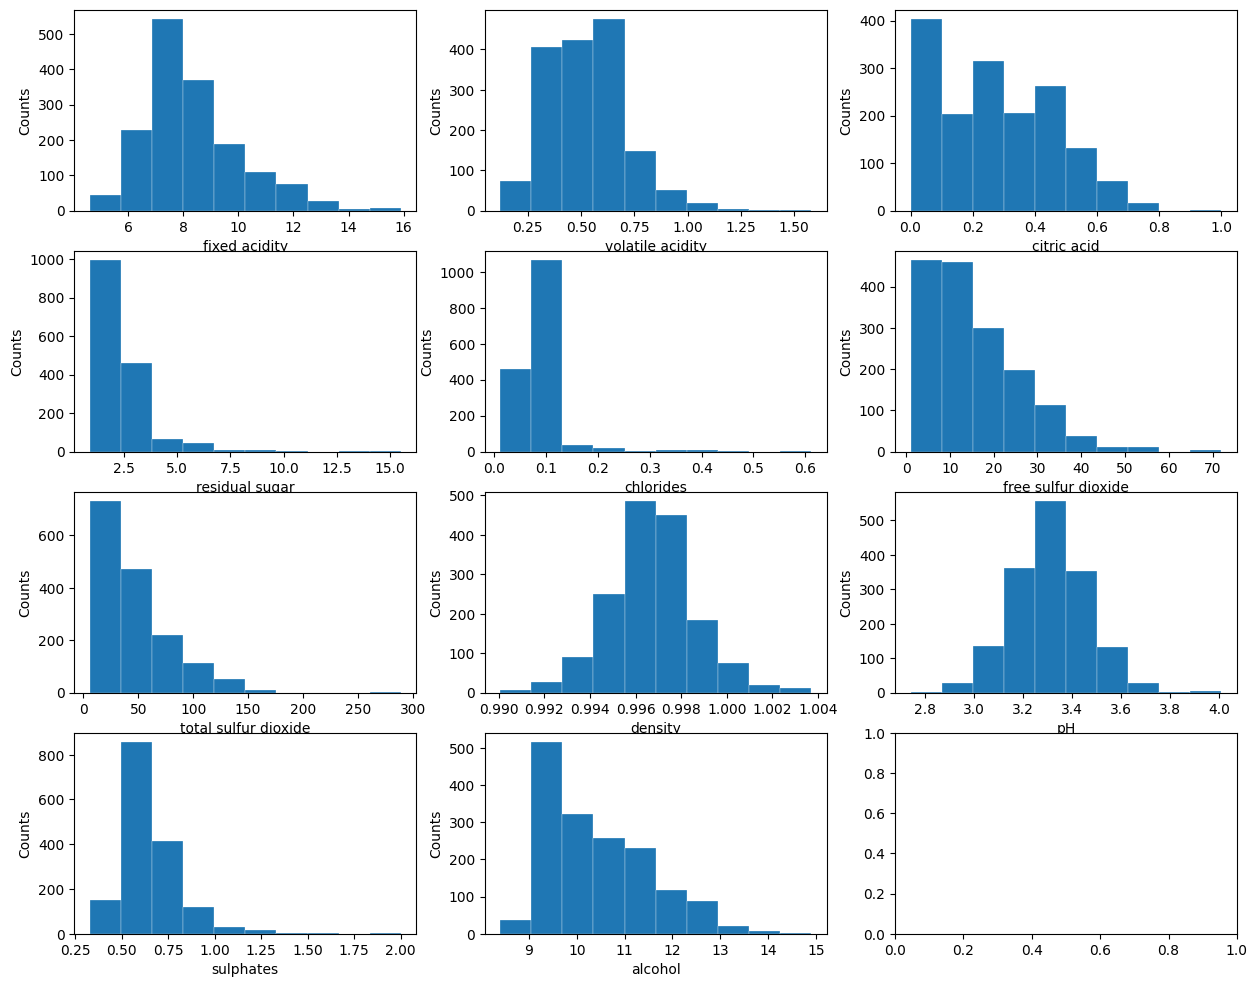

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15,12))
axes = axes.flatten()
for i, col in enumerate(df.drop(columns='quality').columns):
  axes[i].hist(df[col], edgecolor='white', linewidth=0.2)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Counts')
  axes[i].grid(False)

plt.show()

## Q4. (1 point)

Create a new column, "IS_A." The value of "IS_A" is based on the "quality" column: if "quality" is equal to "A," then "IS_A" is set to `True`; otherwise, it is set to `False`.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
      <th>IS_A</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.4</td>
      <td>0.700</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.99780</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>7.8</td>
      <td>0.880</td>
      <td>0.00</td>
      <td>2.6</td>
      <td>0.098</td>
      <td>25.0</td>
      <td>67.0</td>
      <td>0.99680</td>
      <td>3.20</td>
      <td>0.68</td>
      <td>9.8</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.8</td>
      <td>0.760</td>
      <td>0.04</td>
      <td>2.3</td>
      <td>0.092</td>
      <td>15.0</td>
      <td>54.0</td>
      <td>0.99700</td>
      <td>3.26</td>
      <td>0.65</td>
      <td>9.8</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11.2</td>
      <td>0.280</td>
      <td>0.56</td>
      <td>1.9</td>
      <td>0.075</td>
      <td>17.0</td>
      <td>60.0</td>
      <td>0.99800</td>
      <td>3.16</td>
      <td>0.58</td>
      <td>9.8</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7.4</td>
      <td>0.700</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.99780</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1594</th>
      <td>6.2</td>
      <td>0.600</td>
      <td>0.08</td>
      <td>2.0</td>
      <td>0.090</td>
      <td>32.0</td>
      <td>44.0</td>
      <td>0.99490</td>
      <td>3.45</td>
      <td>0.58</td>
      <td>10.5</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1595</th>
      <td>5.9</td>
      <td>0.550</td>
      <td>0.10</td>
      <td>2.2</td>
      <td>0.062</td>
      <td>39.0</td>
      <td>51.0</td>
      <td>0.99512</td>
      <td>3.52</td>
      <td>0.76</td>
      <td>11.2</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>1596</th>
      <td>6.3</td>
      <td>0.510</td>
      <td>0.13</td>
      <td>2.3</td>
      <td>0.076</td>
      <td>29.0</td>
      <td>40.0</td>
      <td>0.99574</td>
      <td>3.42</td>
      <td>0.75</td>
      <td>11.0</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>1597</th>
      <td>5.9</td>
      <td>0.645</td>
      <td>0.12</td>
      <td>2.0</td>
      <td>0.075</td>
      <td>32.0</td>
      <td>44.0</td>
      <td>0.99547</td>
      <td>3.57</td>
      <td>0.71</td>
      <td>10.2</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1598</th>
      <td>6.0</td>
      <td>0.310</td>
      <td>0.47</td>
      <td>3.6</td>
      <td>0.067</td>
      <td>18.0</td>
      <td>42.0</td>
      <td>0.99549</td>
      <td>3.39</td>
      <td>0.66</td>
      <td>11.0</td>
      <td>A</td>
      <td>True</td>
    </tr>
  </tbody>
</table>
<p>1599 rows × 13 columns</p>
</div>

In [ ]:
df['IS_A'] = df['quality'] == 'A'

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Q5. (1 point)

Split the dataset into two parts: a training dataset and a testing dataset, with 30% of the data allocated to the testing dataset. Use `sklearn.model_selection.train_test_split` to perform the split.

training dataset

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
      <th>IS_A</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1517</th>
      <td>6.5</td>
      <td>0.530</td>
      <td>0.06</td>
      <td>2.0</td>
      <td>0.063</td>
      <td>29.0</td>
      <td>44.0</td>
      <td>0.99489</td>
      <td>3.38</td>
      <td>0.83</td>
      <td>10.3</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>694</th>
      <td>9.0</td>
      <td>0.470</td>
      <td>0.31</td>
      <td>2.7</td>
      <td>0.084</td>
      <td>24.0</td>
      <td>125.0</td>
      <td>0.99840</td>
      <td>3.31</td>
      <td>0.61</td>
      <td>9.4</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>833</th>
      <td>11.6</td>
      <td>0.470</td>
      <td>0.44</td>
      <td>1.6</td>
      <td>0.147</td>
      <td>36.0</td>
      <td>51.0</td>
      <td>0.99836</td>
      <td>3.38</td>
      <td>0.86</td>
      <td>9.9</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>85</th>
      <td>6.9</td>
      <td>0.550</td>
      <td>0.15</td>
      <td>2.2</td>
      <td>0.076</td>
      <td>19.0</td>
      <td>40.0</td>
      <td>0.99610</td>
      <td>3.41</td>
      <td>0.59</td>
      <td>10.1</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>591</th>
      <td>6.6</td>
      <td>0.390</td>
      <td>0.49</td>
      <td>1.7</td>
      <td>0.070</td>
      <td>23.0</td>
      <td>149.0</td>
      <td>0.99220</td>
      <td>3.12</td>
      <td>0.50</td>
      <td>11.5</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>208</th>
      <td>7.8</td>
      <td>0.440</td>
      <td>0.28</td>
      <td>2.7</td>
      <td>0.100</td>
      <td>18.0</td>
      <td>95.0</td>
      <td>0.99660</td>
      <td>3.22</td>
      <td>0.67</td>
      <td>9.4</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1567</th>
      <td>7.2</td>
      <td>0.695</td>
      <td>0.13</td>
      <td>2.0</td>
      <td>0.076</td>
      <td>12.0</td>
      <td>20.0</td>
      <td>0.99546</td>
      <td>3.29</td>
      <td>0.54</td>
      <td>10.1</td>
      <td>B</td>
      <td>False</td>
    </tr>
    <tr>
      <th>312</th>
      <td>9.0</td>
      <td>0.460</td>
      <td>0.31</td>
      <td>2.8</td>
      <td>0.093</td>
      <td>19.0</td>
      <td>98.0</td>
      <td>0.99815</td>
      <td>3.32</td>
      <td>0.63</td>
      <td>9.5</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>449</th>
      <td>11.9</td>
      <td>0.390</td>
      <td>0.69</td>
      <td>2.8</td>
      <td>0.095</td>
      <td>17.0</td>
      <td>35.0</td>
      <td>0.99940</td>
      <td>3.10</td>
      <td>0.61</td>
      <td>10.8</td>
      <td>A</td>
      <td>True</td>
    </tr>
    <tr>
      <th>477</th>
      <td>10.4</td>
      <td>0.240</td>
      <td>0.49</td>
      <td>1.8</td>
      <td>0.075</td>
      <td>6.0</td>
      <td>20.0</td>
      <td>0.99770</td>
      <td>3.18</td>
      <td>1.06</td>
      <td>11.0</td>
      <td>A</td>
      <td>True</td>
    </tr>
  </tbody>
</table>
<p>1119 rows × 13 columns</p>
</div>

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3)

## Q6. (1 point)

Use the first 11 columns ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol') as features and the 'IS_A' column as the target. Obtain `X_train`, `y_train`, `X_test`, and `y_test`.

X_train

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1517</th>
      <td>6.5</td>
      <td>0.530</td>
      <td>0.06</td>
      <td>2.0</td>
      <td>0.063</td>
      <td>29.0</td>
      <td>44.0</td>
      <td>0.99489</td>
      <td>3.38</td>
      <td>0.83</td>
      <td>10.3</td>
    </tr>
    <tr>
      <th>694</th>
      <td>9.0</td>
      <td>0.470</td>
      <td>0.31</td>
      <td>2.7</td>
      <td>0.084</td>
      <td>24.0</td>
      <td>125.0</td>
      <td>0.99840</td>
      <td>3.31</td>
      <td>0.61</td>
      <td>9.4</td>
    </tr>
    <tr>
      <th>833</th>
      <td>11.6</td>
      <td>0.470</td>
      <td>0.44</td>
      <td>1.6</td>
      <td>0.147</td>
      <td>36.0</td>
      <td>51.0</td>
      <td>0.99836</td>
      <td>3.38</td>
      <td>0.86</td>
      <td>9.9</td>
    </tr>
    <tr>
      <th>85</th>
      <td>6.9</td>
      <td>0.550</td>
      <td>0.15</td>
      <td>2.2</td>
      <td>0.076</td>
      <td>19.0</td>
      <td>40.0</td>
      <td>0.99610</td>
      <td>3.41</td>
      <td>0.59</td>
      <td>10.1</td>
    </tr>
    <tr>
      <th>591</th>
      <td>6.6</td>
      <td>0.390</td>
      <td>0.49</td>
      <td>1.7</td>
      <td>0.070</td>
      <td>23.0</td>
      <td>149.0</td>
      <td>0.99220</td>
      <td>3.12</td>
      <td>0.50</td>
      <td>11.5</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>208</th>
      <td>7.8</td>
      <td>0.440</td>
      <td>0.28</td>
      <td>2.7</td>
      <td>0.100</td>
      <td>18.0</td>
      <td>95.0</td>
      <td>0.99660</td>
      <td>3.22</td>
      <td>0.67</td>
      <td>9.4</td>
    </tr>
    <tr>
      <th>1567</th>
      <td>7.2</td>
      <td>0.695</td>
      <td>0.13</td>
      <td>2.0</td>
      <td>0.076</td>
      <td>12.0</td>
      <td>20.0</td>
      <td>0.99546</td>
      <td>3.29</td>
      <td>0.54</td>
      <td>10.1</td>
    </tr>
    <tr>
      <th>312</th>
      <td>9.0</td>
      <td>0.460</td>
      <td>0.31</td>
      <td>2.8</td>
      <td>0.093</td>
      <td>19.0</td>
      <td>98.0</td>
      <td>0.99815</td>
      <td>3.32</td>
      <td>0.63</td>
      <td>9.5</td>
    </tr>
    <tr>
      <th>449</th>
      <td>11.9</td>
      <td>0.390</td>
      <td>0.69</td>
      <td>2.8</td>
      <td>0.095</td>
      <td>17.0</td>
      <td>35.0</td>
      <td>0.99940</td>
      <td>3.10</td>
      <td>0.61</td>
      <td>10.8</td>
    </tr>
    <tr>
      <th>477</th>
      <td>10.4</td>
      <td>0.240</td>
      <td>0.49</td>
      <td>1.8</td>
      <td>0.075</td>
      <td>6.0</td>
      <td>20.0</td>
      <td>0.99770</td>
      <td>3.18</td>
      <td>1.06</td>
      <td>11.0</td>
    </tr>
  </tbody>
</table>
<p>1119 rows × 11 columns</p>
</div>

X_test

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1072</th>
      <td>7.2</td>
      <td>0.35</td>
      <td>0.26</td>
      <td>1.8</td>
      <td>0.083</td>
      <td>33.0</td>
      <td>75.0</td>
      <td>0.99680</td>
      <td>3.40</td>
      <td>0.58</td>
      <td>9.5</td>
    </tr>
    <tr>
      <th>24</th>
      <td>6.9</td>
      <td>0.40</td>
      <td>0.14</td>
      <td>2.4</td>
      <td>0.085</td>
      <td>21.0</td>
      <td>40.0</td>
      <td>0.99680</td>
      <td>3.43</td>
      <td>0.63</td>
      <td>9.7</td>
    </tr>
    <tr>
      <th>934</th>
      <td>6.6</td>
      <td>0.61</td>
      <td>0.01</td>
      <td>1.9</td>
      <td>0.080</td>
      <td>8.0</td>
      <td>25.0</td>
      <td>0.99746</td>
      <td>3.69</td>
      <td>0.73</td>
      <td>10.5</td>
    </tr>
    <tr>
      <th>993</th>
      <td>7.1</td>
      <td>0.34</td>
      <td>0.28</td>
      <td>2.0</td>
      <td>0.082</td>
      <td>31.0</td>
      <td>68.0</td>
      <td>0.99694</td>
      <td>3.45</td>
      <td>0.48</td>
      <td>9.4</td>
    </tr>
    <tr>
      <th>233</th>
      <td>6.9</td>
      <td>0.52</td>
      <td>0.25</td>
      <td>2.6</td>
      <td>0.081</td>
      <td>10.0</td>
      <td>37.0</td>
      <td>0.99685</td>
      <td>3.46</td>
      <td>0.50</td>
      <td>11.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>714</th>
      <td>9.9</td>
      <td>0.74</td>
      <td>0.28</td>
      <td>2.6</td>
      <td>0.078</td>
      <td>21.0</td>
      <td>77.0</td>
      <td>0.99800</td>
      <td>3.28</td>
      <td>0.51</td>
      <td>9.8</td>
    </tr>
    <tr>
      <th>920</th>
      <td>9.6</td>
      <td>0.41</td>
      <td>0.37</td>
      <td>2.3</td>
      <td>0.091</td>
      <td>10.0</td>
      <td>23.0</td>
      <td>0.99786</td>
      <td>3.24</td>
      <td>0.56</td>
      <td>10.5</td>
    </tr>
    <tr>
      <th>1331</th>
      <td>7.8</td>
      <td>0.87</td>
      <td>0.26</td>
      <td>3.8</td>
      <td>0.107</td>
      <td>31.0</td>
      <td>67.0</td>
      <td>0.99668</td>
      <td>3.26</td>
      <td>0.46</td>
      <td>9.2</td>
    </tr>
    <tr>
      <th>1510</th>
      <td>6.4</td>
      <td>0.36</td>
      <td>0.21</td>
      <td>2.2</td>
      <td>0.047</td>
      <td>26.0</td>
      <td>48.0</td>
      <td>0.99661</td>
      <td>3.47</td>
      <td>0.77</td>
      <td>9.7</td>
    </tr>
    <tr>
      <th>938</th>
      <td>7.2</td>
      <td>0.38</td>
      <td>0.38</td>
      <td>2.8</td>
      <td>0.068</td>
      <td>23.0</td>
      <td>42.0</td>
      <td>0.99356</td>
      <td>3.34</td>
      <td>0.72</td>
      <td>12.9</td>
    </tr>
  </tbody>
</table>
<p>480 rows × 11 columns</p>
</div>

y_train

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>IS_A</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1517</th>
      <td>True</td>
    </tr>
    <tr>
      <th>694</th>
      <td>False</td>
    </tr>
    <tr>
      <th>833</th>
      <td>False</td>
    </tr>
    <tr>
      <th>85</th>
      <td>False</td>
    </tr>
    <tr>
      <th>591</th>
      <td>True</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>208</th>
      <td>False</td>
    </tr>
    <tr>
      <th>1567</th>
      <td>False</td>
    </tr>
    <tr>
      <th>312</th>
      <td>True</td>
    </tr>
    <tr>
      <th>449</th>
      <td>True</td>
    </tr>
    <tr>
      <th>477</th>
      <td>True</td>
    </tr>
  </tbody>
</table>
<p>1119 rows × 1 columns</p>
</div>

y_test

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>IS_A</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1072</th>
      <td>True</td>
    </tr>
    <tr>
      <th>24</th>
      <td>True</td>
    </tr>
    <tr>
      <th>934</th>
      <td>False</td>
    </tr>
    <tr>
      <th>993</th>
      <td>False</td>
    </tr>
    <tr>
      <th>233</th>
      <td>False</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>714</th>
      <td>False</td>
    </tr>
    <tr>
      <th>920</th>
      <td>False</td>
    </tr>
    <tr>
      <th>1331</th>
      <td>False</td>
    </tr>
    <tr>
      <th>1510</th>
      <td>True</td>
    </tr>
    <tr>
      <th>938</th>
      <td>True</td>
    </tr>
  </tbody>
</table>
<p>480 rows × 1 columns</p>
</div>

In [ ]:
X_train = train_df.iloc[:,:11]
X_test = test_df.iloc[:, :11]
y_train = train_df['IS_A']
y_test = test_df['IS_A']

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
255             8.0             0.570         0.23             3.2      0.073   
504            10.5             0.240         0.42             1.8      0.077   
1562            7.2             0.695         0.13             2.0      0.076   
308            10.3             0.430         0.44             2.4      0.214   
761             9.3             0.655         0.26             2.0      0.096   
...             ...               ...          ...             ...        ...   
450            11.9             0.390         0.69             2.8      0.095   
1585            7.2             0.390         0.44             2.6      0.066   
1501            7.8             0.820         0.29             4.3      0.083   
755             7.8             0.910         0.07             1.9      0.058   
836             6.7             0.280         0.28             2.4      0.012   

      free sulfur dioxide  

## Q7. (1 point)

Use the Standard Scaler to scale both the training X data and the testing X data. Save the results as `X_train_scaled` and `X_test_scaled`.

X_train_scaled

```text
array([[-1.04719964,  0.01401048, -1.07457948, ...,  0.45303483,
         0.98302649, -0.09589652],
       [ 0.40796676, -0.32134192,  0.20088239, ...,  0.00258778,
        -0.28718903, -0.97003184],
       [ 1.92133981, -0.32134192,  0.86412257, ...,  0.45303483,
         1.1562377 , -0.4844011 ],
       ...,
       [ 0.40796676, -0.37723399,  0.20088239, ...,  0.06693736,
        -0.17171489, -0.87290569],
       [ 2.09595978, -0.76847846,  2.13958444, ..., -1.34875334,
        -0.28718903,  0.38973421],
       [ 1.22285994, -1.60685946,  1.11921494, ..., -0.83395672,
         2.31097909,  0.58398651]])
```

X_test_scaled

```text
array([[-0.63975305, -0.99204672, -0.05420998, ...,  0.58173398,
        -0.46040024, -0.87290569],
       [-0.81437302, -0.71258639, -0.66643168, ...,  0.77478271,
        -0.17171489, -0.6786534 ],
       [-0.98899298,  0.46114701, -1.32967185, ...,  2.44787173,
         0.4056558 ,  0.09835577],
       ...,
       [-0.29051311,  1.91434075, -0.05420998, ..., -0.3191601 ,
        -1.15324508, -1.16428413],
       [-1.1054063 , -0.93615466, -0.30930235, ...,  1.03218102,
         0.63660408, -0.6786534 ],
       [-0.63975305, -0.82437052,  0.55801172, ...,  0.19563652,
         0.34791873,  2.42938329]])
```

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-0.20021173  0.23557608 -0.2213709  ... -0.316409   -0.52555365
  -1.05251414]
 [ 1.25912207 -1.58394242  0.75773596 ... -0.6476173   2.40119985
   0.35657458]
 [-0.66719854  0.92478764 -0.7366903  ... -0.11768402 -0.70847574
  -0.30100016]
 ...
 [-0.31695843  1.61399919  0.08782074 ... -0.97882559 -0.76944977
  -0.95857489]
 [-0.31695843  2.11023151 -1.04588194 ...  1.33963249 -1.37919009
   0.26263533]
 [-0.9590653  -1.36339472  0.0362888  ... -0.316409   -1.62308621
   1.20202781]]
[[ 0.38352179 -0.37093009 -0.2213709  ... -1.37627555 -0.58652768
  -1.14645339]
 [-0.66719854 -0.92229933  0.96386372 ...  0.61097423  1.18171923
   0.54445308]
 [-1.30930541  0.29071301 -0.2213709  ...  1.00842419 -0.0377614
   1.9535418 ]
 ...
 [-0.14183838  1.88968381 -1.40660552 ... -0.38265066 -0.95237187
  -0.5828179 ]
 [-1.075812   -0.75688856 -0.2213709  ...  0.87594087 -0.64750171
   1.57778481]
 [ 2.71845586 -1.14284703  1.94297058 ... -1.70748385 -0.28165752
   0.16869609]]


## Q8. (1 point)

Build an `SGDClassifier` model.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)

SGDClassifier()

## Q9. (1 point)

Predict the quality of the testing dataset using the scaled testing data, `X_test_scaled`.

In [ ]:
y_pred = sgd.predict(X_test_scaled)

## Q10. (1 point)

Calculate the accuracy of the predictions on the testing dataset.

You should get a similar result to the following (it does not need to be exactly the same number):

0.7395833333333334

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.70625


## Q11. (3 points)

Calculate the precision, recall, F1-score, specificity, and false positive rate for the testing dataset.

You should get a similar result to the following (it does not need to be exactly the same number):

precision: 0.7433264887063655

recall: 0.7098039215686275

F1 score: 0.7433264887063655

specificity: 0.7733333333333333

false positive rate: 0.22666666666666668

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)

print("precision:", precision)
print("recall:", recall)
print("F1 score:", f1)
print("specificity:", specificity)
print("false positive rate:", false_positive_rate)

precision: 0.7689075630252101
recall: 0.6802973977695167
F1 score: 0.7218934911242604
specificity: 0.7393364928909952
false positive rate: 0.26066350710900477


## Q12. (3 points)

Plot the ROC curve.

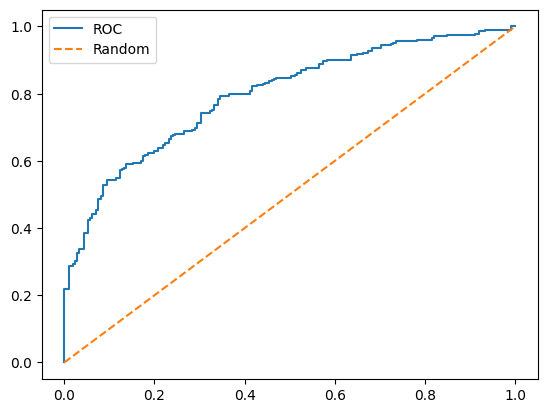

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, sgd.decision_function(X_test_scaled))

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.legend()
plt.show()

## Q13. (1 point)

Calculate the AUC (Area Under the Curve).

You should get a similar result to the following (it does not need to be exactly the same number):

0.7965141612200435

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7956975986187211


## Q14. (3 points)

Interpret the generated values (the scores) and provide comments on the model's performance. What do you think of the generated model? Is it effective? Discuss possible reasons why the scores might not be higher.

The higher precision indicated that the model is correct most of the time. A higher recall indicated that it identifies most positive cases but does miss a significant amount as well. The F-1 score supports this statement as it was also on the higher end. Specificity was in the same range, indicating that not many negatives were missed but still some. False positives indicate that 1/4 of cases were incorrectly identified as positive. The AUC is in line with all of this as being nearly at 0.8 is typically good.

Overall, the model is effective as it finds success most of the time. It still makes a non negligible amount of errors so it could use refinement, but it is in the effective range.

Some reasons the scores may not be higher are the type of tuning done/not done, noise in the data, or an imbalanced dataset which creates bias in the data.